# CSCI 3352 Biological Networks, Spring 2021, Prof. Clauset

# Lecture 7 lab : epidemic simulations

***

**Team names**: 

***

This is an in-class "laboratory," in which you will explore the behavior of the basic SIR model of an epidemic on a network.

The lab is divided into three parts:
1. A warm-up in which you develop intuition about how an epidemic spreads on a network.
* An experiment in which you explore the epidemic threshold of $\beta/\gamma=R_0=1$, and how the shape of an epidemic varies as a function of $R_0$, for a fixed network $G$.
* An experiment in "flattening the epidemic", in which you explore how specific changes to either the epidemic parameters ($\beta$ and $\gamma$) or to the underlying exposure graph $G$, can alter the "length" and "height" of the epidemic.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import random as rnd
rnd.seed()
import copy

In [2]:
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11d646','#11c6d6','#d67711','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)
    
    node_colors = []
    for i in G.nodes():
        if z[i]=='S':
            cid = 0
        if z[i]=='I':
            cid = 1
        if z[i]=='R':
            cid = 2
        node_colors.append(colors[int(cid)])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
    
    nx.draw_kamada_kawai(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it prettier
    #nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

***
## Part 1 : getting familiar with basic SIR on a network

The code below implements a basic SIR model on a network $G$, where $G$ is the same toy graph used in the lecture notes. It
* sets the SIR parameters to $\beta=\gamma=0.3$
  * uses 2 dictionaries to represent nodes' current (`zt`) and next (`zu`) states so that updating is synchronous
  * use 3 lists $S(t)$,$I(t)$,$R(t)$ to track the number of nodes in each state
* begins by choosing a uniformly random node $i$ to be "patient 0" (set `zt[i]=1`)
* then, applies $S\to I$ updates, by looping over edges
* then, applies $I\to R$ updates, by looping over nodes
* halts when no nodes are in the $I$ state
* then uses `drawGz()` to visualize the epidemic's progression
* and both plots the $S(t)$,$I(t)$,$R(t)$ time series, and reports the number of nodes in $S$ and $R$ at the end

To warm up, run this SIR simulation several times with the given $\beta,\gamma$ parameters and examine both the graph visualizations and the final $S(t)$,$I(t)$,$R(t)$ time series. Consider the following questions:
1. How often does the epidemic infect all or nearly all the nodes?
2. Does _which_ node is patient 0 matter for how far the epidemic spreads?

time step 1


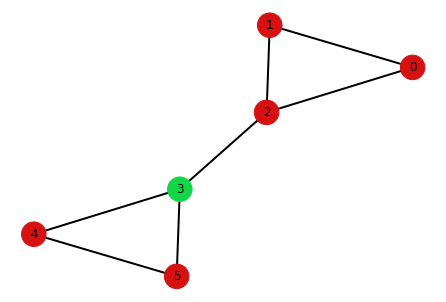

time step 2


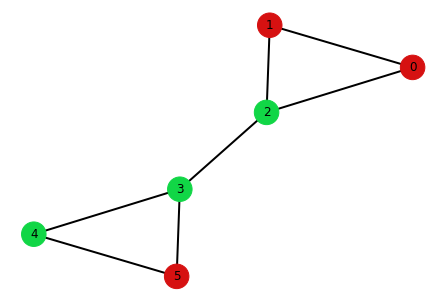

time step 3


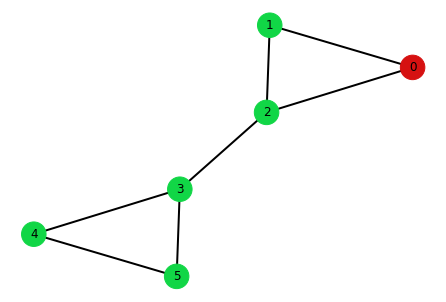

time step 4


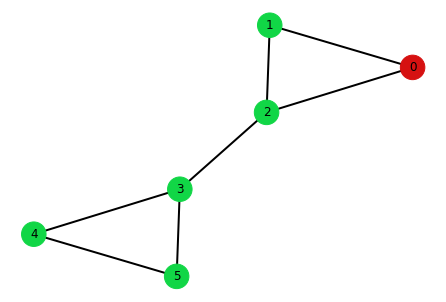

time step 5


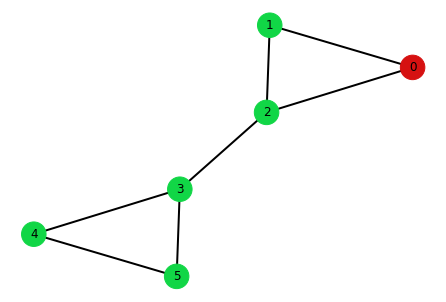

time step 6


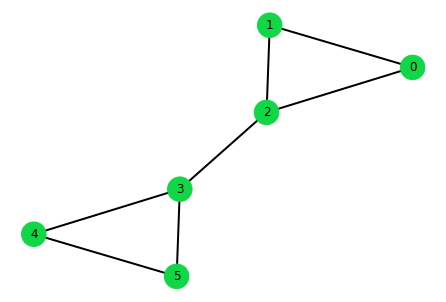

time step 7


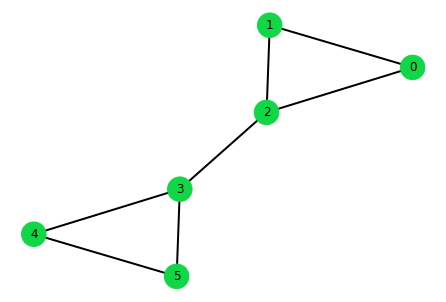

time step 8


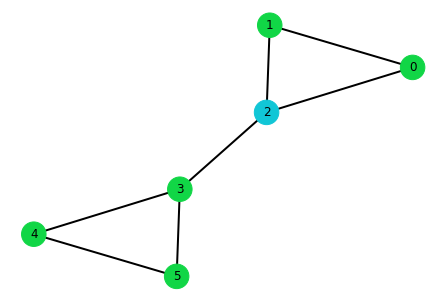

time step 9


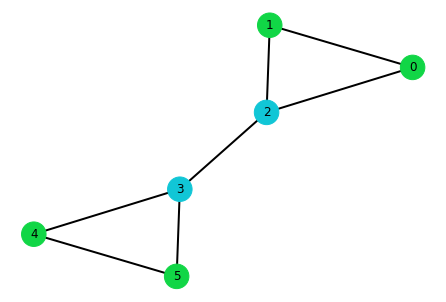

time step 10


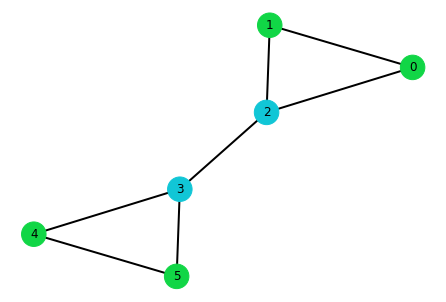

time step 11


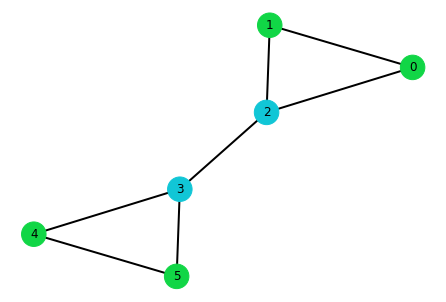

time step 12


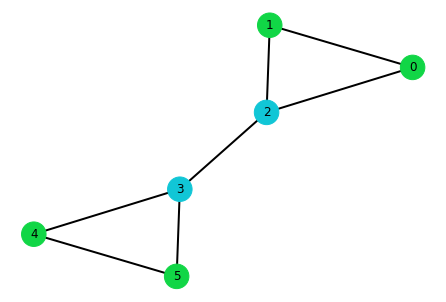

time step 13


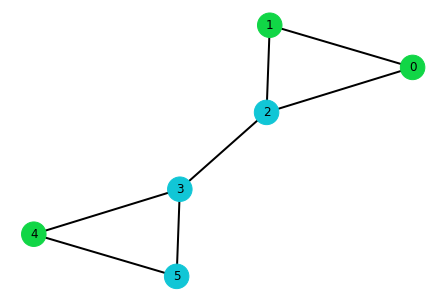

time step 14


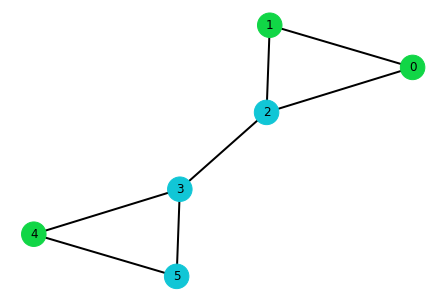

time step 15


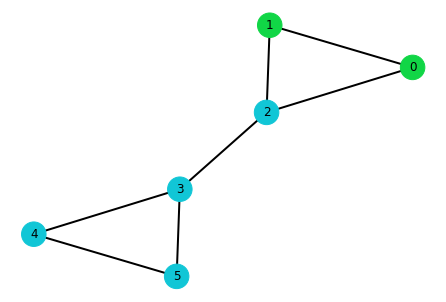

time step 16


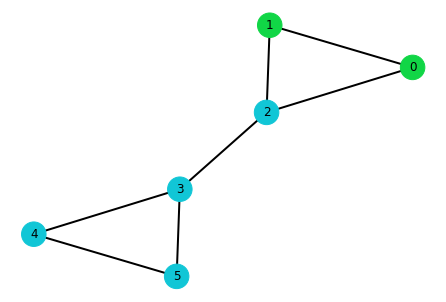

time step 17


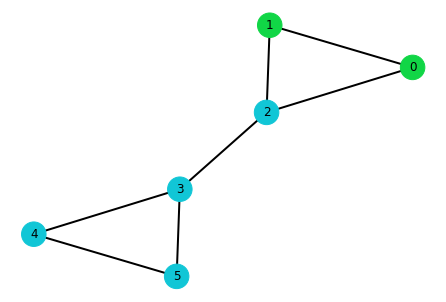

time step 18


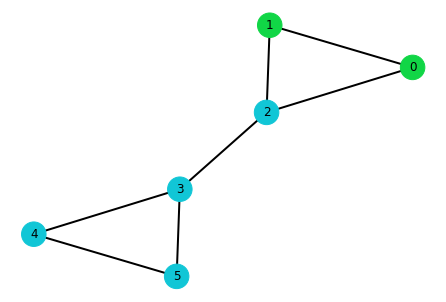

time step 19


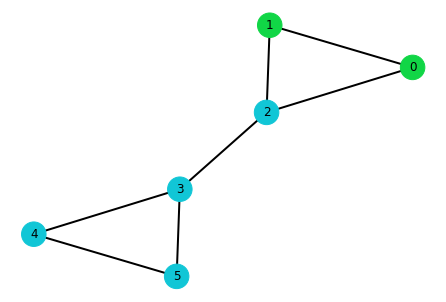

time step 20


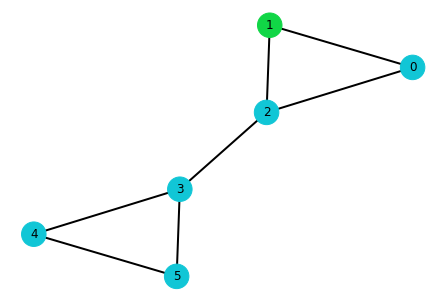

time step 21


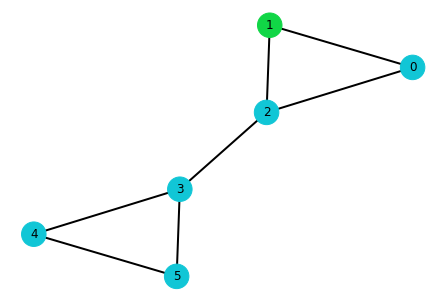

time step 22


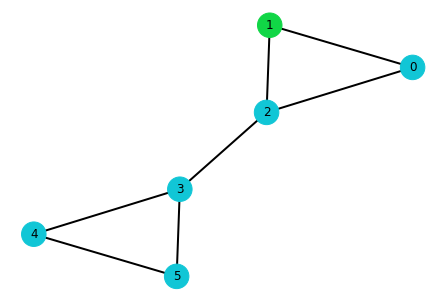

time step 23


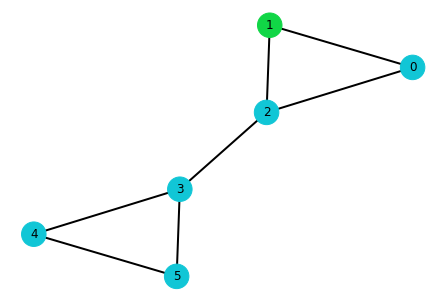

time step 24


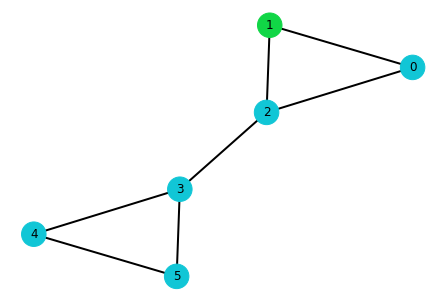

time step 25


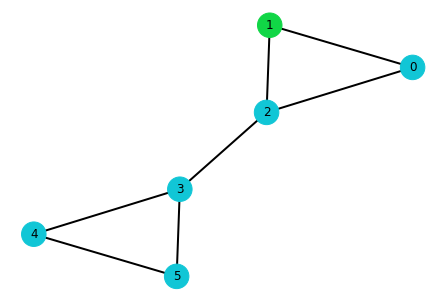

time step 26


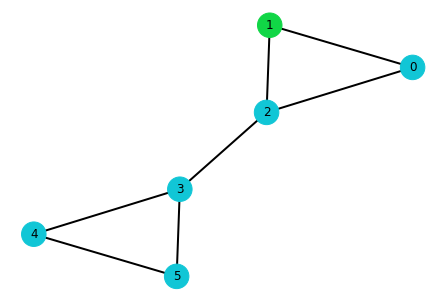

time step 27


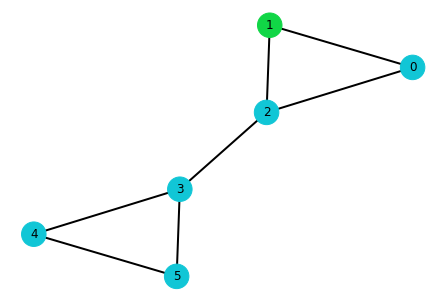

time step 28


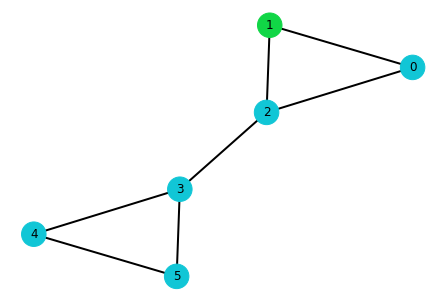

time step 29


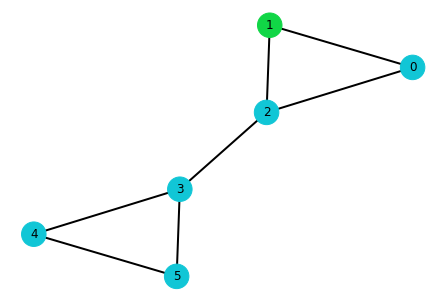

time step 30


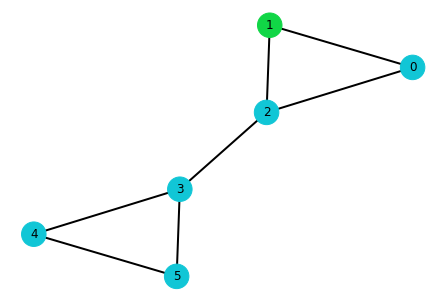

time step 31


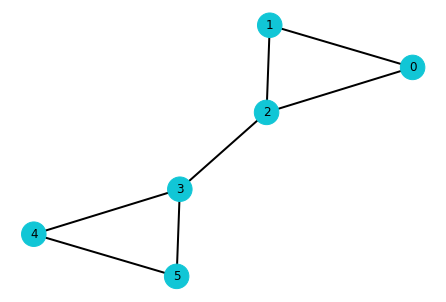

number of steps in epidemic: 30
final number of S: 0
final number of R: 6


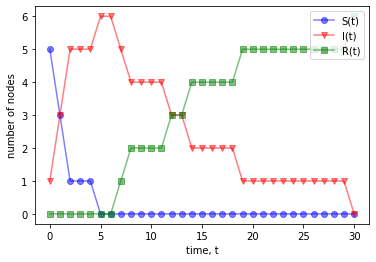

In [26]:
# Basic SIR simulation

G  = nx.Graph([(0,1),(0,2),(1,2),(2,3),(3,4),(3,5),(4,5)]) # a simple graph G

n  = G.order()
zt = dict.fromkeys(range(n), 'S') # all nodes S, initially

beta = 0.5 # probability of {S-I} -> {I-I}
gmma = 0.1 # probability of {I}   -> {R}

St = [] # S(t), time series of number of S nodes per time step t
It = [] # I(t), time series of number of I nodes per time step t
Rt = [] # R(t), time series of number of R nodes per time step t

seed     = int(rnd.randint(0,n-1)) # pick a random node is patient 0
zt[seed] = 'I'
t        = 1

print(f'time step {t}')
drawGz(G,zt)

Sc,Ic,Rc = n-1,1,0 # S,I,R node counts, initial
St.append(Sc)
It.append(Ic)
Rt.append(Rc)
while any(xi == 'I' for xi in zt.values()):
    zu = copy.deepcopy(zt) # nodes states for next time step (synchronous updates)
    
    # do S -> I transitions
    for e in G.edges():
        i,j = e[0],e[1]           # this edge (i,j)
        if zt[i]=='I' and zt[j]=='S' and zu[j]!='I':
            if rnd.random() < beta:
                zu[j] = 'I'       # i infects j for next round
                Sc,Ic = Sc-1,Ic+1 # update counts

        if zt[i]=='S' and zt[j]=='I' and zu[i]!='I':
            if rnd.random() < beta:
                zu[i] = 'I'       # j infects i for next round
                Sc,Ic = Sc-1,Ic+1 # update counts

    # do I -> R transitions
    for i in G.nodes():
        if zt[i] == 'I' and rnd.random() < gmma:
            zu[i] = 'R'           # i recovers (R)
            Ic,Rc = Ic-1,Rc+1     # update counts

    # update all states synchronously, update clock
    zt = copy.deepcopy(zu)
    t  = t+1
    print(f'time step {t}')
    drawGz(G,zt)

    St.append(Sc)
    It.append(Ic)
    Rt.append(Rc) # append these counts to the time series

# report how it went
print(f'number of steps in epidemic: {t-1}')
print(f'final number of S: {Sc}')
print(f'final number of R: {Rc}')

# plot the S(t),I(t),R(t) time series nicely
fig = plt.figure()
ax1 = fig.add_subplot(111) # put multiple 
plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), It, 'rv-', alpha=0.5,label='I(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), Rt, 'gs-', alpha=0.5,label='R(t)')  # plot the log-likelihood trajectory
plt.ylabel('number of nodes')
plt.xlabel('time, t')
plt.legend(loc='upper right');
plt.show()

***
## Part 2 : varying $\beta$ and $\gamma$

Using the SIR simulation from `Part 1`, conduct the following three mini-experiments. For these, use the built-in `.connected_caveman_graph(l,k)` network generator in `networkx`, with `l=10` (number of cliques) and `k=6` (size of clique).
1. set $\beta/\gamma=0.5$, in the _subcritical_ regime of $R_0$
* set $\beta/\gamma=1$, at the epidemic threshold of $R_0$
* set $\beta/\gamma=2$, in the _supercritical_ regime of $R_0$

You'll want to run each setting several times to get a sense of what the epidemic tends to do. If you aren't able to get much to happen, try increasing the magnitude of $\beta,\gamma$. For each, discuss with your teammates what you see happening, and answer the following specific questions:
1. In each of the three cases, describe in a few words how far the epidemic tends to spread.
* Which edges are the critical ones for spreading the epidemic?
* Recall the classic $S(t)$,$I(t)$,$R(t)$ plot from the lecture; how are these functions similar or different here?
* How do the dynamics change when you set $\beta=\gamma=1$ (the most extreme setting)?

time step 1


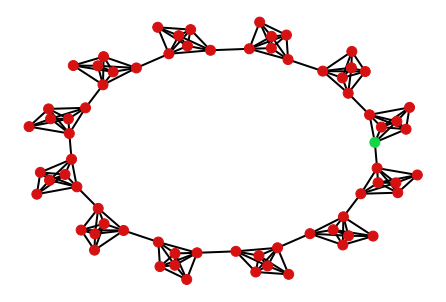

time step 2


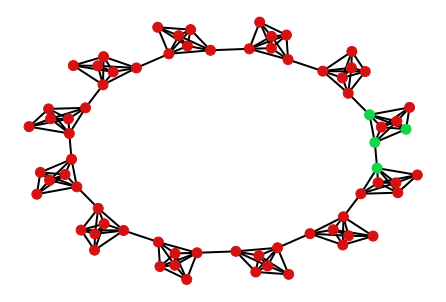

time step 3


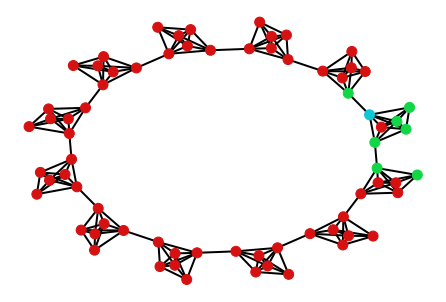

time step 4


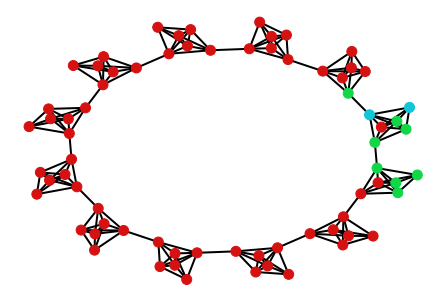

time step 5


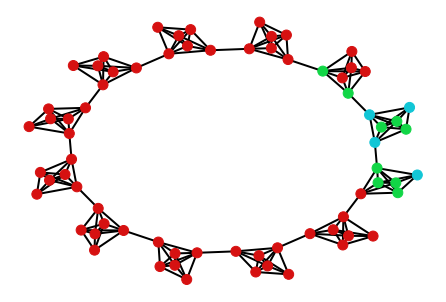

time step 6


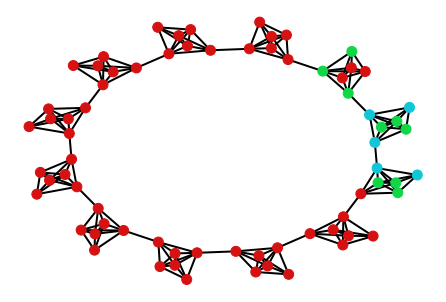

time step 7


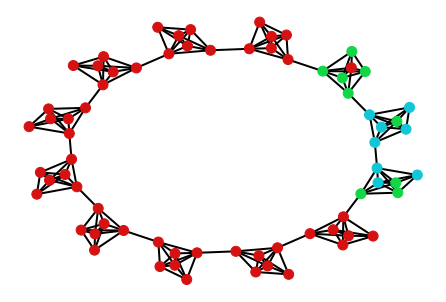

time step 8


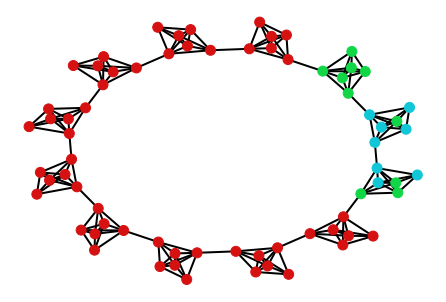

time step 9


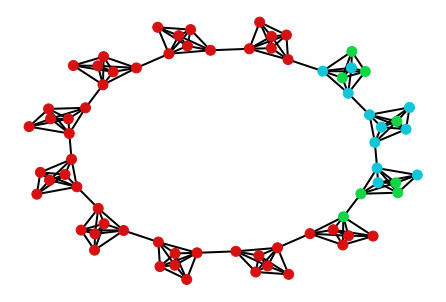

time step 10


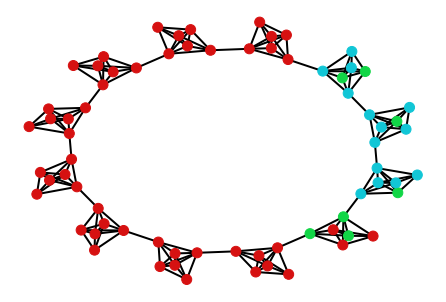

time step 11


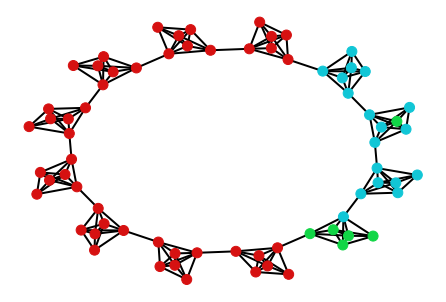

time step 12


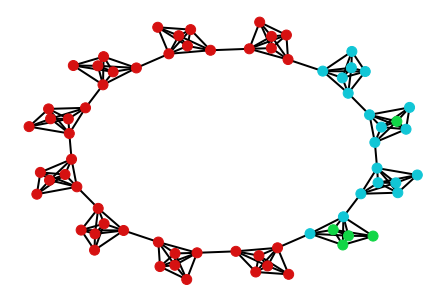

time step 13


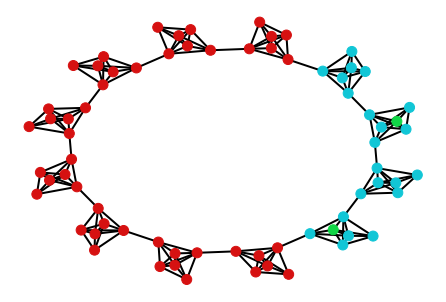

time step 14


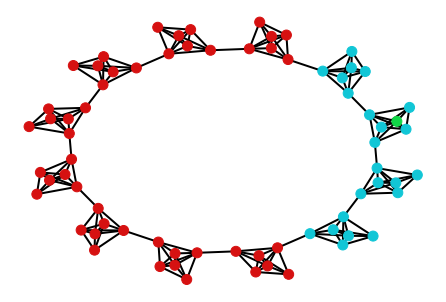

time step 15


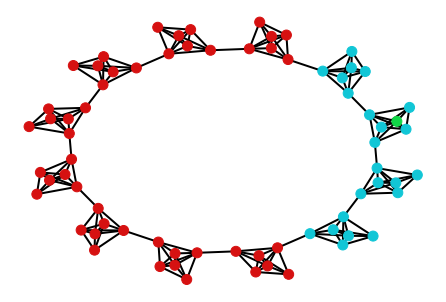

time step 16


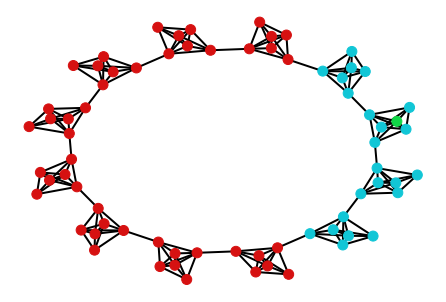

time step 17


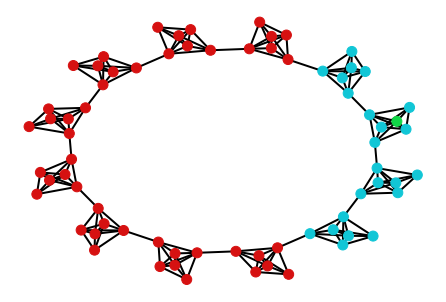

time step 18


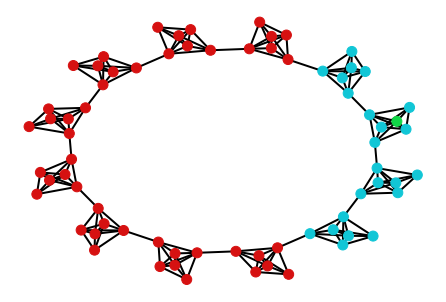

time step 19


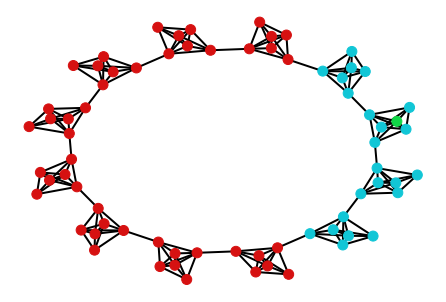

time step 20


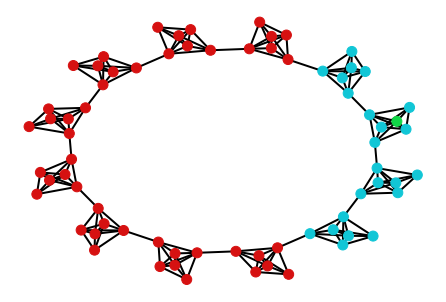

time step 21


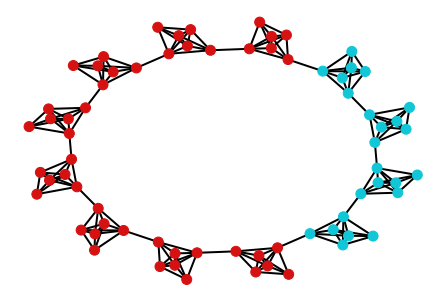

number of steps in epidemic: 20
final number of S: 48
final number of R: 24


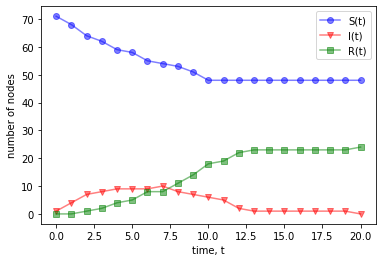

In [33]:
# epidemic threshold experiments
l,k = 12,6 # l cliques each containing k nodes
G   = nx.connected_caveman_graph(l,k)

# YOUR CODE
n  = G.order()
zt = dict.fromkeys(range(n), 'S') # all nodes S, initially

beta = 0.3 # probability of {S-I} -> {I-I}
gmma = 0.3 # probability of {I}   -> {R}

St = [] # S(t), time series of number of S nodes per time step t
It = [] # I(t), time series of number of I nodes per time step t
Rt = [] # R(t), time series of number of R nodes per time step t

seed     = int(rnd.randint(0,n-1)) # pick a random node is patient 0
zt[seed] = 'I'
t        = 1

print(f'time step {t}')
drawGz(G,zt)

Sc,Ic,Rc = n-1,1,0 # S,I,R node counts, initial
St.append(Sc)
It.append(Ic)
Rt.append(Rc)
while any(xi == 'I' for xi in zt.values()):
    zu = copy.deepcopy(zt) # nodes states for next time step (synchronous updates)
    
    # do S -> I transitions
    for e in G.edges():
        i,j = e[0],e[1]           # this edge (i,j)
        if zt[i]=='I' and zt[j]=='S' and zu[j]!='I':
            if rnd.random() < beta:
                zu[j] = 'I'       # i infects j for next round
                Sc,Ic = Sc-1,Ic+1 # update counts

        if zt[i]=='S' and zt[j]=='I' and zu[i]!='I':
            if rnd.random() < beta:
                zu[i] = 'I'       # j infects i for next round
                Sc,Ic = Sc-1,Ic+1 # update counts

    # do I -> R transitions
    for i in G.nodes():
        if zt[i] == 'I' and rnd.random() < gmma:
            zu[i] = 'R'           # i recovers (R)
            Ic,Rc = Ic-1,Rc+1     # update counts

    # update all states synchronously, update clock
    zt = copy.deepcopy(zu)
    t  = t+1
    print(f'time step {t}')
    drawGz(G,zt)

    St.append(Sc)
    It.append(Ic)
    Rt.append(Rc) # append these counts to the time series

# report how it went
print(f'number of steps in epidemic: {t-1}')
print(f'final number of S: {Sc}')
print(f'final number of R: {Rc}')

# plot the S(t),I(t),R(t) time series nicely
fig = plt.figure()
ax1 = fig.add_subplot(111) # put multiple 
plt.plot(range(t), St, 'bo-', alpha=0.5,label='S(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), It, 'rv-', alpha=0.5,label='I(t)')  # plot the log-likelihood trajectory
plt.plot(range(t), Rt, 'gs-', alpha=0.5,label='R(t)')  # plot the log-likelihood trajectory
plt.ylabel('number of nodes')
plt.xlabel('time, t')
plt.legend(loc='upper right');
plt.show()


Your discussion

***
## Part 3 : flattening an epidemic

Again using the SIR simulation from `Part 1`, conduct the following three mini-experiments. For these, use the built-in `.gnp_random_graph(n, p)` network generator in `networkx`. Recall that `p` is the probability that an edge exists, and we choose it by first choosing the _mean degree_ $c$ (see Lecture Notes 3). The idea here is that the first experiment sets up your baseline for an SIR epidemic on a network, and then we'll first vary one parameter, and then vary a different parameter, to investigate the effects these parameters have on the dynamics of the epidemic. To do this, you'll want to plot the $S(t)$,$I(t)$,$R(t)$ functions after each simulation.

Experiment 3.1: simulate a basic epidemic:
* set $n=200$ and $c=6$
* note around what time step $I(t)$ peaks, and how many time steps it mostly spans.

Experiment 3.2: simulate the effect of reduced transmission (e.g., hand washing!):
* lower $\beta$; keep $\gamma$ the same, $n=200$ and $c=6$

Experiment 3.3: simulate the effect of "social distancing" (e.g., self-quarantine, staying at home, etc.):
* lower $c$ in $G(n,p)$; keep $\beta=\gamma$, $n=200$

As before, you'll want to run each setting several times to get a sense of what the epidemic tends to do. Start by lowering $\beta$ and $c$ only a little, and then keep lowering them until you see something change. Then, discuss with your teammates what you found, and answer the following specific questions:
1. What effect does lowering $\beta$ (reducing the likelihood of transmission) have on $I(t)$, compared to experiment 3.1? How much reduced transmission would you need _everyone_ to do to achieve a real "flattening" of the epidemic? Do you think that's realistic?
* What effect does lowering $c$ (reducing the likelihood of transmission) have on $I(t)$?, compared to experiment 3.1? How much social distancing would you need_everyone_ to do to achieve the results you found in experiment 3.3? (Consider what a typical $c$ might be for _you_ during a normal day. Is $c=6$ realistic?)
* Which has a larger effect on $I(t)$, reduced transmission or social distancing?
* As time allows, run another experiment in which you keep $\beta$ and $c$ the same, but instead increase the recovery rate (e.g., better health care). What effect does this have on $I(t)$, compared to the other experiments?

In [ ]:

# YOUR CODE


Your discussion

***
## Part 4 : explore!

What else can you do with this simulation? Try some things out. Different graphs (see `networkx` for various graph generators), different numbers of states, zombies!, vaccinations, etc.